### Importing Libraries

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from utils import *

### Importing the dataset

In [14]:
df = pd.read_excel("seating_data.xlsx")
relationship_df = df.set_index("idx")

In [15]:
# Normalize to 0-based indexing
relationship_df.columns = relationship_df.columns.astype(int) - 1
relationship_df.index = relationship_df.index - 1
relationship_matrix = relationship_df.to_numpy()

### Constant Definition

In [16]:
POP_SIZE = 75
NUM_GENERATIONS = 800
MUT_PROB = 0.1
ELITE_SIZE = 0 #No Elitism in the beggining
GUEST_LIST = list(range(64))
BEST_SCORE = 0
Iteration_Number = 10

In [17]:
#We needed to put the wrapper to use it because this mutation use relationship matrix
def greedy_wrapper(repr, mut_prob):
    return greedy_local_replacement_mutation(repr, relationship_matrix, mut_prob)

## Swap Mutation

### Genetic Algorythm with no Elitism and table-based crossover

--- Run 1 ---
Generation 0: Best fitness = 22400
Generation 10: Best fitness = 26600
Generation 20: Best fitness = 26300
Generation 30: Best fitness = 24500
Generation 40: Best fitness = 25500
Generation 50: Best fitness = 20500
Generation 60: Best fitness = 24400
Generation 70: Best fitness = 25100
Generation 80: Best fitness = 22600
Generation 90: Best fitness = 23100
Generation 100: Best fitness = 23700
Generation 110: Best fitness = 22000
Generation 120: Best fitness = 24300
Generation 130: Best fitness = 20800
Generation 140: Best fitness = 25100
Generation 150: Best fitness = 24800
Generation 160: Best fitness = 22600
Generation 170: Best fitness = 24400
Generation 180: Best fitness = 26900
Generation 190: Best fitness = 25800
Generation 200: Best fitness = 22100
Generation 210: Best fitness = 24400
Generation 220: Best fitness = 25500
Generation 230: Best fitness = 22100
Generation 240: Best fitness = 24000
Generation 250: Best fitness = 22200
Generation 260: Best fitness = 2260

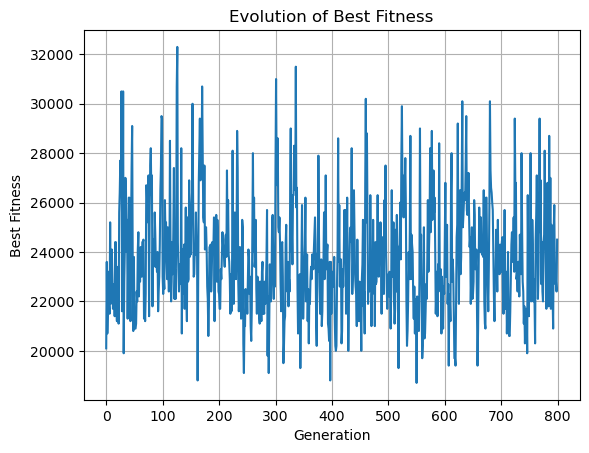


Best seating plan:
Table 1: [22, 47, 48, 31, 63, 52, 59, 45]
Table 2: [57, 23, 46, 24, 18, 29, 11, 56]
Table 3: [60, 26, 25, 33, 16, 12, 41, 32]
Table 4: [9, 34, 49, 5, 58, 35, 7, 0]
Table 5: [53, 44, 20, 1, 13, 4, 14, 62]
Table 6: [28, 51, 10, 42, 39, 8, 61, 40]
Table 7: [43, 17, 3, 37, 55, 2, 54, 50]
Table 8: [30, 38, 15, 6, 19, 36, 27, 21]
Best fitness across 10 runs: 26900


In [ ]:
for run in range(Iteration_Number):
    print(f"--- Run {run + 1} ---")
    
    best_solution, fitness_history = run_ga(
        relationship_matrix,
        mutation_fn=swap_mutation,
        crossover_fn=crossover_table_based,
        pop_size=POP_SIZE,
        guest_list=GUEST_LIST,
        num_generations=NUM_GENERATIONS,
        elite_size=ELITE_SIZE,
        mut_prob=MUT_PROB,
        selection_alg=roulette_selection
    )
    score = fitness(best_solution, relationship_matrix)
    if score > BEST_SCORE:
        BEST_SCORE = score
    # Save the best solution on pickle
    save_best_solution_if_improved(best_solution, relationship_matrix)

# Plot fitness over generations
plt.plot(fitness_history)
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.title("Evolution of Best Fitness")
plt.grid(True)
plt.show()

# Output best seating plan
print("\nBest seating plan:")
for i, table in enumerate(get_tables(best_solution)):
    print(f"Table {i+1}: {table}")

# Print the best fitness across all runs
print(f"Best fitness across {Iteration_Number} runs: {BEST_SCORE}")

### Start using Elitism in the table-based crossover

--- Run 1 ---
Generation 0: Best fitness = 24600
Generation 10: Best fitness = 28300
Generation 20: Best fitness = 30700
Generation 30: Best fitness = 33700
Generation 40: Best fitness = 33700
Generation 50: Best fitness = 33700
Generation 60: Best fitness = 34800
Generation 70: Best fitness = 34800
Generation 80: Best fitness = 34800
Generation 90: Best fitness = 34800
Generation 100: Best fitness = 34800
Generation 110: Best fitness = 34800
Generation 120: Best fitness = 35800
Generation 130: Best fitness = 37100
Generation 140: Best fitness = 38100
Generation 150: Best fitness = 38200
Generation 160: Best fitness = 38200
Generation 170: Best fitness = 40300
Generation 180: Best fitness = 40300
Generation 190: Best fitness = 40300
Generation 200: Best fitness = 40300
Generation 210: Best fitness = 40300
Generation 220: Best fitness = 40300
Generation 230: Best fitness = 40400
Generation 240: Best fitness = 40400
Generation 250: Best fitness = 40400
Generation 260: Best fitness = 4100

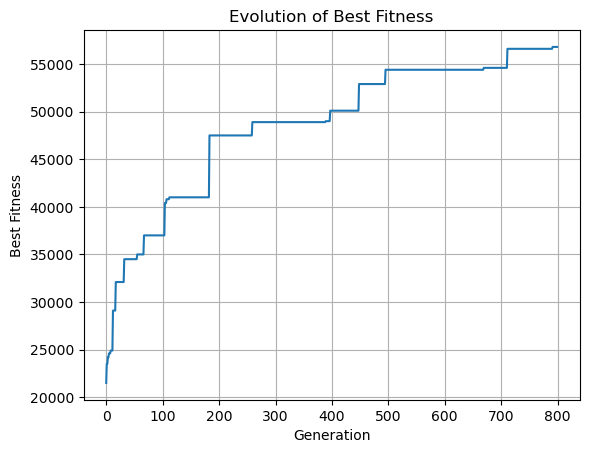


Best seating plan:
Table 1: [6, 8, 7, 52, 3, 2, 45, 9]
Table 2: [19, 33, 26, 17, 5, 25, 15, 16]
Table 3: [0, 35, 4, 37, 44, 34, 18, 1]
Table 4: [24, 23, 54, 22, 55, 47, 46, 38]
Table 5: [40, 39, 53, 31, 57, 20, 41, 42]
Table 6: [14, 60, 62, 50, 48, 56, 63, 61]
Table 7: [13, 21, 49, 12, 58, 59, 27, 32]
Table 8: [28, 30, 11, 10, 36, 43, 51, 29]
Best fitness across 10 runs: 56800


In [ ]:
ELITE_SIZE = int(0.02 * POP_SIZE) #2% of the population passes

for run in range(Iteration_Number):
    print(f"--- Run {run + 1} ---")
    
    best_solution, fitness_history = run_ga(
        relationship_matrix,
        mutation_fn=swap_mutation,
        crossover_fn=crossover_table_based,
        pop_size=POP_SIZE,
        guest_list=GUEST_LIST,
        num_generations=NUM_GENERATIONS,
        elite_size=ELITE_SIZE,
        mut_prob=MUT_PROB,
        selection_alg=roulette_selection
    )
    score = fitness(best_solution, relationship_matrix)
    if score > BEST_SCORE:
        BEST_SCORE = score
    #Save the best solution on pickle
    save_best_solution_if_improved(best_solution, relationship_matrix)

# Plot fitness over generations
plt.plot(fitness_history)
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.title("Evolution of Best Fitness")
plt.grid(True)
plt.show()

# Output best seating plan
print("\nBest seating plan:")
for i, table in enumerate(get_tables(best_solution)):
    print(f"Table {i+1}: {table}")

# Print the best fitness across all runs
print(f"Best fitness across {Iteration_Number} runs: {BEST_SCORE}")

### No Elitism with Uniform crossover and swap mutation

--- Run 1 ---
Generation 0: Best fitness = 25000
Generation 10: Best fitness = 27300
Generation 20: Best fitness = 23500
Generation 30: Best fitness = 24600
Generation 40: Best fitness = 25500
Generation 50: Best fitness = 23600
Generation 60: Best fitness = 27200
Generation 70: Best fitness = 26700
Generation 80: Best fitness = 25400
Generation 90: Best fitness = 23600
Generation 100: Best fitness = 29500
Generation 110: Best fitness = 29400
Generation 120: Best fitness = 26500
Generation 130: Best fitness = 26800
Generation 140: Best fitness = 30300
Generation 150: Best fitness = 27600
Generation 160: Best fitness = 28300
Generation 170: Best fitness = 27000
Generation 180: Best fitness = 26900
Generation 190: Best fitness = 35300
Generation 200: Best fitness = 25700
Generation 210: Best fitness = 25200
Generation 220: Best fitness = 25500
Generation 230: Best fitness = 26600
Generation 240: Best fitness = 28100
Generation 250: Best fitness = 31300
Generation 260: Best fitness = 3140

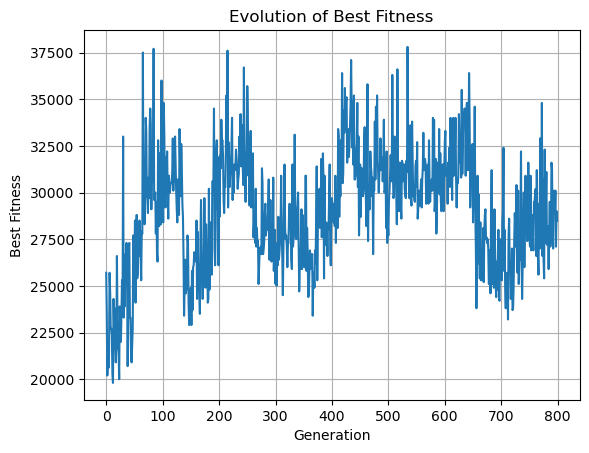


Best seating plan:
Table 1: [18, 0, 1, 19, 20, 11, 8, 10]
Table 2: [44, 31, 32, 36, 14, 26, 25, 7]
Table 3: [45, 21, 43, 48, 59, 53, 24, 9]
Table 4: [57, 46, 3, 40, 47, 6, 23, 22]
Table 5: [39, 52, 4, 16, 51, 62, 41, 61]
Table 6: [63, 50, 56, 33, 35, 13, 5, 15]
Table 7: [34, 17, 29, 60, 28, 27, 37, 38]
Table 8: [42, 49, 54, 58, 30, 12, 55, 2]
Best fitness across 10 runs: 56800


In [ ]:
ELITE_SIZE = 0

for run in range(Iteration_Number):
    print(f"--- Run {run + 1} ---")
    
    best_solution, fitness_history = run_ga(
        relationship_matrix,
        mutation_fn=swap_mutation,
        crossover_fn=uniform_guest_crossover,
        pop_size=POP_SIZE,
        guest_list=GUEST_LIST,
        num_generations=NUM_GENERATIONS,
        elite_size=ELITE_SIZE,
        mut_prob=MUT_PROB,
        selection_alg=roulette_selection
    )
    score = fitness(best_solution, relationship_matrix)
    if score > BEST_SCORE:
        BEST_SCORE = score
    #Save the best solution on pickle
    save_best_solution_if_improved(best_solution, relationship_matrix)

# Plot fitness over generations
plt.plot(fitness_history)
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.title("Evolution of Best Fitness")
plt.grid(True)
plt.show()

# Output best seating plan
print("\nBest seating plan:")
for i, table in enumerate(get_tables(best_solution)):
    print(f"Table {i+1}: {table}")

# Print the best fitness across all runs
print(f"Best fitness across {Iteration_Number} runs: {BEST_SCORE}")

### Start using elitism with uniform crossover and swap mutation

--- Run 1 ---
Generation 0: Best fitness = 23100
Generation 10: Best fitness = 27800
Generation 20: Best fitness = 28300
Generation 30: Best fitness = 28300
Generation 40: Best fitness = 28300
Generation 50: Best fitness = 28300
Generation 60: Best fitness = 28300
Generation 70: Best fitness = 31300
Generation 80: Best fitness = 31700
Generation 90: Best fitness = 31700
Generation 100: Best fitness = 31700
Generation 110: Best fitness = 32600
Generation 120: Best fitness = 32600
Generation 130: Best fitness = 36800
Generation 140: Best fitness = 36800
Generation 150: Best fitness = 37500
Generation 160: Best fitness = 37500
Generation 170: Best fitness = 37500
Generation 180: Best fitness = 37500
Generation 190: Best fitness = 37500
Generation 200: Best fitness = 37500
Generation 210: Best fitness = 37500
Generation 220: Best fitness = 37500
Generation 230: Best fitness = 37500
Generation 240: Best fitness = 39600
Generation 250: Best fitness = 39600
Generation 260: Best fitness = 3960

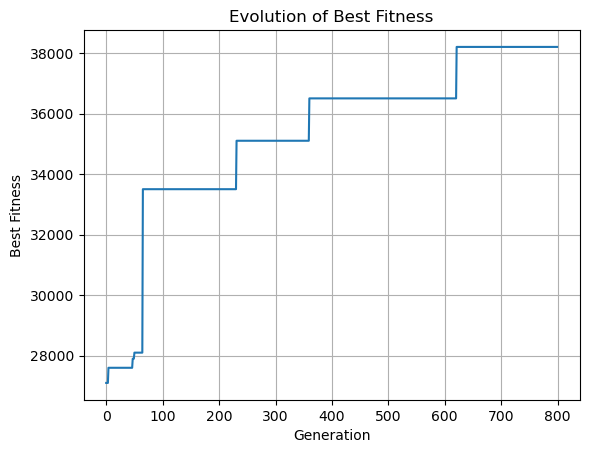


Best seating plan:
Table 1: [39, 32, 57, 40, 41, 56, 22, 31]
Table 2: [51, 38, 36, 52, 35, 54, 62, 50]
Table 3: [2, 42, 18, 14, 55, 6, 24, 49]
Table 4: [12, 27, 11, 33, 13, 48, 37, 43]
Table 5: [5, 10, 34, 26, 3, 4, 25, 30]
Table 6: [23, 61, 60, 21, 8, 17, 15, 16]
Table 7: [47, 46, 59, 0, 20, 44, 19, 1]
Table 8: [63, 28, 29, 53, 7, 9, 45, 58]
Best fitness across 10 runs: 56800


In [ ]:
ELITE_SIZE = int(0.02 * POP_SIZE) #2% of the population passes

for run in range(Iteration_Number):
    print(f"--- Run {run + 1} ---")
    
    best_solution, fitness_history = run_ga(
        relationship_matrix,
        mutation_fn=swap_mutation,
        crossover_fn=uniform_guest_crossover,
        pop_size=POP_SIZE,
        guest_list=GUEST_LIST,
        num_generations=NUM_GENERATIONS,
        elite_size=ELITE_SIZE,
        mut_prob=MUT_PROB,
        selection_alg=roulette_selection
    )
    score = fitness(best_solution, relationship_matrix)
    if score > BEST_SCORE:
        BEST_SCORE = score
    #Save the best solution on pickle
    save_best_solution_if_improved(best_solution, relationship_matrix)

# Plot fitness over generations
plt.plot(fitness_history)
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.title("Evolution of Best Fitness")
plt.grid(True)
plt.show()

# Output best seating plan
print("\nBest seating plan:")
for i, table in enumerate(get_tables(best_solution)):
    print(f"Table {i+1}: {table}")

# Print the best fitness across all runs
print(f"Best fitness across {Iteration_Number} runs: {BEST_SCORE}")

## Inter Table Swap Mutation

### No Elitism combined with table-based crossover

--- Run 1 ---
Generation 0: Best fitness = 25100
Generation 10: Best fitness = 23000
Generation 20: Best fitness = 27800
Generation 30: Best fitness = 25000
Generation 40: Best fitness = 24300
Generation 50: Best fitness = 22500
Generation 60: Best fitness = 28300
Generation 70: Best fitness = 22000
Generation 80: Best fitness = 28700
Generation 90: Best fitness = 23300
Generation 100: Best fitness = 23400
Generation 110: Best fitness = 23300
Generation 120: Best fitness = 23800
Generation 130: Best fitness = 21900
Generation 140: Best fitness = 27700
Generation 150: Best fitness = 25200
Generation 160: Best fitness = 22300
Generation 170: Best fitness = 20200
Generation 180: Best fitness = 21500
Generation 190: Best fitness = 22700
Generation 200: Best fitness = 22800
Generation 210: Best fitness = 23700
Generation 220: Best fitness = 24100
Generation 230: Best fitness = 21800
Generation 240: Best fitness = 25200
Generation 250: Best fitness = 22600
Generation 260: Best fitness = 2770

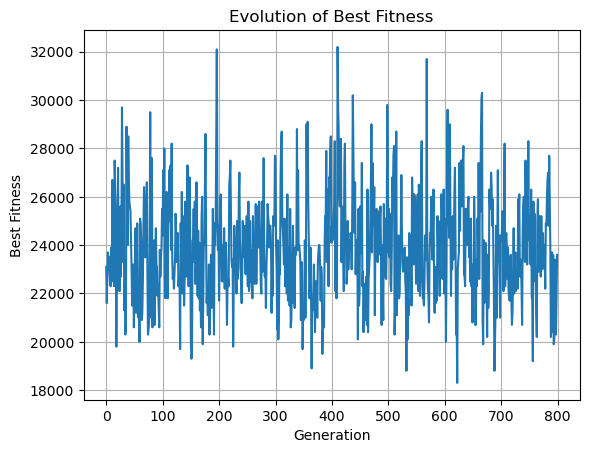


Best seating plan:
Table 1: [20, 14, 24, 31, 55, 32, 33, 23]
Table 2: [34, 13, 35, 56, 18, 22, 39, 26]
Table 3: [4, 15, 36, 48, 28, 58, 38, 10]
Table 4: [17, 16, 49, 3, 42, 5, 9, 37]
Table 5: [54, 40, 53, 45, 59, 2, 21, 60]
Table 6: [50, 25, 27, 51, 19, 8, 46, 29]
Table 7: [6, 47, 62, 44, 63, 52, 7, 61]
Table 8: [30, 43, 12, 57, 1, 11, 0, 41]
Best fitness across 10 runs: 56800


In [ ]:
ELITE_SIZE = 0

for run in range(Iteration_Number):
    print(f"--- Run {run + 1} ---")
    
    best_solution, fitness_history = run_ga(
        relationship_matrix,
        mutation_fn=inter_table_pair_swap_mutation,
        crossover_fn=crossover_table_based,
        pop_size=POP_SIZE,
        guest_list=GUEST_LIST,
        num_generations=NUM_GENERATIONS,
        elite_size=ELITE_SIZE,
        mut_prob=MUT_PROB,
        selection_alg=roulette_selection
    )
    score = fitness(best_solution, relationship_matrix)
    if score > BEST_SCORE:
        BEST_SCORE = score
    #Save the best solution on pickle
    save_best_solution_if_improved(best_solution, relationship_matrix)

# Plot fitness over generations
plt.plot(fitness_history)
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.title("Evolution of Best Fitness")
plt.grid(True)
plt.show()

# Output best seating plan
print("\nBest seating plan:")
for i, table in enumerate(get_tables(best_solution)):
    print(f"Table {i+1}: {table}")

# Print the best fitness across all runs
print(f"Best fitness across {Iteration_Number} runs: {BEST_SCORE}")

### Introduced Elistism with table based crossover

--- Run 1 ---
Generation 0: Best fitness = 25000
Generation 10: Best fitness = 28500
Generation 20: Best fitness = 31300
Generation 30: Best fitness = 33300
Generation 40: Best fitness = 33900
Generation 50: Best fitness = 33900
Generation 60: Best fitness = 33900
Generation 70: Best fitness = 35300
Generation 80: Best fitness = 37300
Generation 90: Best fitness = 37300
Generation 100: Best fitness = 37300
Generation 110: Best fitness = 42300
Generation 120: Best fitness = 42300
Generation 130: Best fitness = 42300
Generation 140: Best fitness = 42300
Generation 150: Best fitness = 43400
Generation 160: Best fitness = 43400
Generation 170: Best fitness = 43600
Generation 180: Best fitness = 43600
Generation 190: Best fitness = 43600
Generation 200: Best fitness = 43600
Generation 210: Best fitness = 43600
Generation 220: Best fitness = 43600
Generation 230: Best fitness = 43600
Generation 240: Best fitness = 43600
Generation 250: Best fitness = 43600
Generation 260: Best fitness = 4360

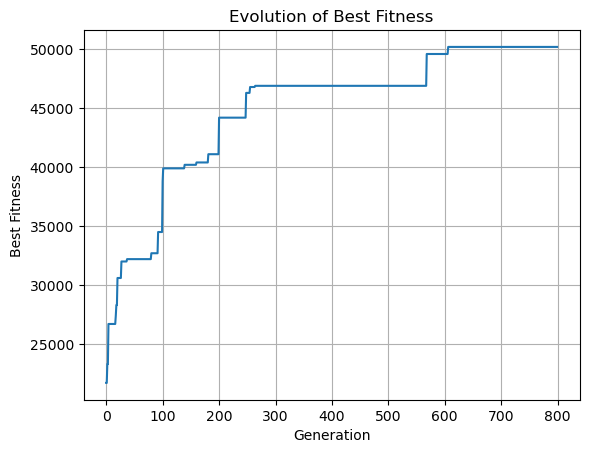


Best seating plan:
Table 1: [27, 17, 1, 4, 21, 58, 16, 0]
Table 2: [12, 45, 31, 63, 44, 38, 32, 13]
Table 3: [2, 62, 24, 14, 10, 3, 23, 7]
Table 4: [8, 59, 46, 42, 47, 49, 11, 36]
Table 5: [56, 41, 30, 39, 57, 40, 52, 48]
Table 6: [35, 34, 18, 60, 33, 61, 19, 20]
Table 7: [9, 54, 6, 43, 25, 55, 37, 53]
Table 8: [50, 29, 5, 22, 51, 28, 15, 26]
Best fitness across 10 runs: 61600


In [ ]:
ELITE_SIZE = int(0.02 * POP_SIZE) #2% of the population passes

for run in range(Iteration_Number):
    print(f"--- Run {run + 1} ---")
    
    best_solution, fitness_history = run_ga(
        relationship_matrix,
        mutation_fn=inter_table_pair_swap_mutation,
        crossover_fn=crossover_table_based,
        pop_size=POP_SIZE,
        guest_list=GUEST_LIST,
        num_generations=NUM_GENERATIONS,
        elite_size=ELITE_SIZE,
        mut_prob=MUT_PROB,
        selection_alg=roulette_selection
    )
    score = fitness(best_solution, relationship_matrix)
    if score > BEST_SCORE:
        BEST_SCORE = score
    #Save the best solution on pickle
    save_best_solution_if_improved(best_solution, relationship_matrix)

# Plot fitness over generations
plt.plot(fitness_history)
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.title("Evolution of Best Fitness")
plt.grid(True)
plt.show()

# Output best seating plan
print("\nBest seating plan:")
for i, table in enumerate(get_tables(best_solution)):
    print(f"Table {i+1}: {table}")

# Print the best fitness across all runs
print(f"Best fitness across {Iteration_Number} runs: {BEST_SCORE}")

### No elitism with uniform crossover

--- Run 1 ---
Generation 0: Best fitness = 23800
Generation 10: Best fitness = 23200
Generation 20: Best fitness = 23800
Generation 30: Best fitness = 23500
Generation 40: Best fitness = 25700
Generation 50: Best fitness = 24700
Generation 60: Best fitness = 26000
Generation 70: Best fitness = 22900
Generation 80: Best fitness = 26100
Generation 90: Best fitness = 32700
Generation 100: Best fitness = 29000
Generation 110: Best fitness = 29700
Generation 120: Best fitness = 30200
Generation 130: Best fitness = 25900
Generation 140: Best fitness = 26100
Generation 150: Best fitness = 26000
Generation 160: Best fitness = 26400
Generation 170: Best fitness = 31500
Generation 180: Best fitness = 32500
Generation 190: Best fitness = 31700
Generation 200: Best fitness = 28400
Generation 210: Best fitness = 25800
Generation 220: Best fitness = 30200
Generation 230: Best fitness = 27900
Generation 240: Best fitness = 26900
Generation 250: Best fitness = 26800
Generation 260: Best fitness = 2490

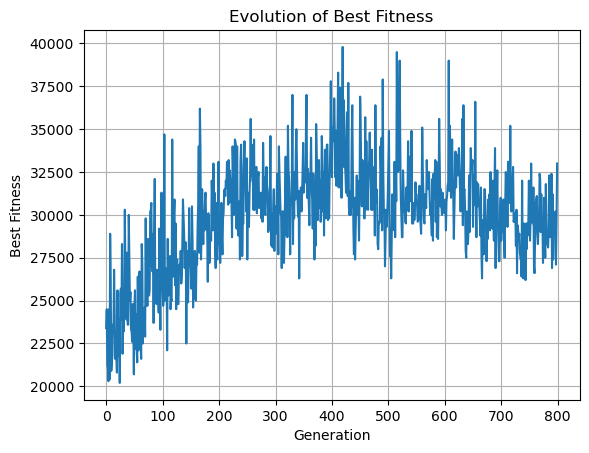


Best seating plan:
Table 1: [60, 1, 30, 29, 28, 61, 62, 8]
Table 2: [6, 7, 9, 17, 50, 54, 18, 21]
Table 3: [45, 22, 35, 41, 38, 53, 34, 15]
Table 4: [13, 31, 57, 16, 14, 32, 23, 4]
Table 5: [0, 2, 26, 42, 20, 59, 49, 19]
Table 6: [52, 11, 10, 25, 51, 27, 55, 56]
Table 7: [44, 5, 3, 12, 48, 39, 24, 40]
Table 8: [37, 46, 58, 63, 36, 47, 33, 43]
Best fitness across 10 runs: 61600


In [ ]:
ELITE_SIZE = 0

for run in range(Iteration_Number):
    print(f"--- Run {run + 1} ---")
    
    best_solution, fitness_history = run_ga(
        relationship_matrix,
        mutation_fn=inter_table_pair_swap_mutation,
        crossover_fn=uniform_guest_crossover,
        pop_size=POP_SIZE,
        guest_list=GUEST_LIST,
        num_generations=NUM_GENERATIONS,
        elite_size=ELITE_SIZE,
        mut_prob=MUT_PROB,
        selection_alg=roulette_selection
    )
    score = fitness(best_solution, relationship_matrix)
    if score > BEST_SCORE:
        BEST_SCORE = score
    #Save the best solution on pickle
    save_best_solution_if_improved(best_solution, relationship_matrix)

# Plot fitness over generations
plt.plot(fitness_history)
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.title("Evolution of Best Fitness")
plt.grid(True)
plt.show()

# Output best seating plan
print("\nBest seating plan:")
for i, table in enumerate(get_tables(best_solution)):
    print(f"Table {i+1}: {table}")

# Print the best fitness across all runs
print(f"Best fitness across {Iteration_Number} runs: {BEST_SCORE}")

### Introduced Elitism with Uniform crossover

--- Run 1 ---
Generation 0: Best fitness = 24300
Generation 10: Best fitness = 24300
Generation 20: Best fitness = 26200
Generation 30: Best fitness = 29200
Generation 40: Best fitness = 29200
Generation 50: Best fitness = 29200
Generation 60: Best fitness = 29200
Generation 70: Best fitness = 29600
Generation 80: Best fitness = 29600
Generation 90: Best fitness = 32700
Generation 100: Best fitness = 32700
Generation 110: Best fitness = 32700
Generation 120: Best fitness = 32700
Generation 130: Best fitness = 34100
Generation 140: Best fitness = 34100
Generation 150: Best fitness = 34100
Generation 160: Best fitness = 34100
Generation 170: Best fitness = 34100
Generation 180: Best fitness = 34400
Generation 190: Best fitness = 34400
Generation 200: Best fitness = 34400
Generation 210: Best fitness = 34400
Generation 220: Best fitness = 34500
Generation 230: Best fitness = 34500
Generation 240: Best fitness = 34500
Generation 250: Best fitness = 34500
Generation 260: Best fitness = 3450

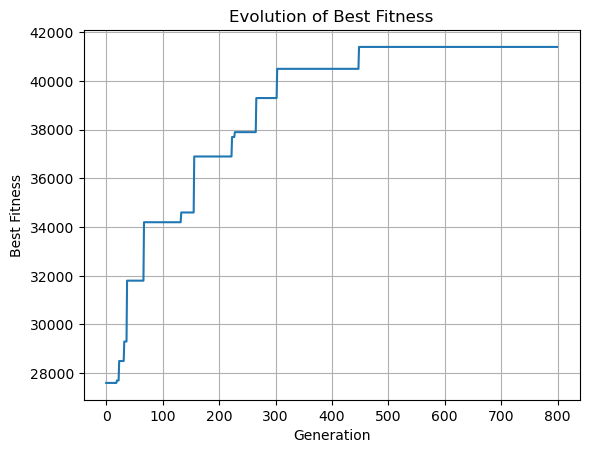


Best seating plan:
Table 1: [31, 32, 9, 10, 11, 49, 47, 46]
Table 2: [55, 58, 51, 50, 54, 28, 63, 52]
Table 3: [15, 17, 21, 12, 19, 18, 20, 16]
Table 4: [38, 60, 33, 3, 62, 56, 35, 34]
Table 5: [1, 59, 0, 37, 2, 57, 40, 53]
Table 6: [23, 44, 7, 4, 22, 13, 5, 6]
Table 7: [25, 24, 45, 26, 30, 27, 41, 43]
Table 8: [29, 42, 39, 48, 36, 8, 61, 14]
Best fitness across 10 runs: 61600


In [ ]:
ELITE_SIZE = int(0.02 * POP_SIZE) #2% of the population passes

for run in range(Iteration_Number):
    print(f"--- Run {run + 1} ---")
    
    best_solution, fitness_history = run_ga(
        relationship_matrix,
        mutation_fn=inter_table_pair_swap_mutation,
        crossover_fn=uniform_guest_crossover,
        pop_size=POP_SIZE,
        guest_list=GUEST_LIST,
        num_generations=NUM_GENERATIONS,
        elite_size=ELITE_SIZE,
        mut_prob=MUT_PROB,
        selection_alg=roulette_selection
    )
    score = fitness(best_solution, relationship_matrix)
    if score > BEST_SCORE:
        BEST_SCORE = score
    #Save the best solution on pickle
    save_best_solution_if_improved(best_solution, relationship_matrix)

# Plot fitness over generations
plt.plot(fitness_history)
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.title("Evolution of Best Fitness")
plt.grid(True)
plt.show()

# Output best seating plan
print("\nBest seating plan:")
for i, table in enumerate(get_tables(best_solution)):
    print(f"Table {i+1}: {table}")

# Print the best fitness across all runs
print(f"Best fitness across {Iteration_Number} runs: {BEST_SCORE}")

## Greedy local replacement Mutation

### No elitism with table based crossover

--- Run 1 ---
Generation 0: Best fitness = 19200
Generation 10: Best fitness = 25800
Generation 20: Best fitness = 24700
Generation 30: Best fitness = 24000
Generation 40: Best fitness = 24000
Generation 50: Best fitness = 28900
Generation 60: Best fitness = 33500
Generation 70: Best fitness = 28300
Generation 80: Best fitness = 24600
Generation 90: Best fitness = 26200
Generation 100: Best fitness = 26800
Generation 110: Best fitness = 27500
Generation 120: Best fitness = 21400
Generation 130: Best fitness = 24400
Generation 140: Best fitness = 24200
Generation 150: Best fitness = 24300
Generation 160: Best fitness = 26800
Generation 170: Best fitness = 25900
Generation 180: Best fitness = 28300
Generation 190: Best fitness = 25200
Generation 200: Best fitness = 28600
Generation 210: Best fitness = 24500
Generation 220: Best fitness = 25600
Generation 230: Best fitness = 24800
Generation 240: Best fitness = 22600
Generation 250: Best fitness = 24000
Generation 260: Best fitness = 2400

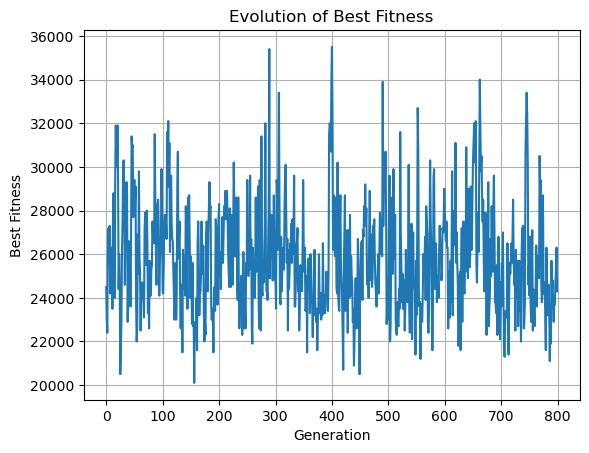


Best seating plan:
Table 1: [33, 12, 9, 6, 37, 5, 43, 45]
Table 2: [63, 55, 19, 4, 47, 0, 1, 32]
Table 3: [50, 11, 36, 22, 48, 57, 59, 49]
Table 4: [40, 35, 31, 15, 51, 18, 28, 29]
Table 5: [54, 46, 38, 10, 13, 24, 14, 27]
Table 6: [23, 16, 17, 7, 21, 8, 58, 20]
Table 7: [25, 62, 41, 53, 61, 34, 60, 52]
Table 8: [2, 30, 42, 3, 26, 44, 56, 39]
Best fitness across 10 runs: 61600


In [ ]:
ELITE_SIZE = 0

for run in range(Iteration_Number):
    print(f"--- Run {run + 1} ---")
    
    best_solution, fitness_history = run_ga(
        relationship_matrix,
        mutation_fn=greedy_wrapper,
        crossover_fn=crossover_table_based,
        pop_size=POP_SIZE,
        guest_list=GUEST_LIST,
        num_generations=NUM_GENERATIONS,
        elite_size=ELITE_SIZE,
        mut_prob=MUT_PROB,
        selection_alg=roulette_selection
    )
    score = fitness(best_solution, relationship_matrix)
    if score > BEST_SCORE:
        BEST_SCORE = score
    #Save the best solution on pickle
    save_best_solution_if_improved(best_solution, relationship_matrix)

# Plot fitness over generations
plt.plot(fitness_history)
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.title("Evolution of Best Fitness")
plt.grid(True)
plt.show()

# Output best seating plan
print("\nBest seating plan:")
for i, table in enumerate(get_tables(best_solution)):
    print(f"Table {i+1}: {table}")

# Print the best fitness across all runs
print(f"Best fitness across {Iteration_Number} runs: {BEST_SCORE}")

### Elitism with table based crossover

--- Run 1 ---
Generation 0: Best fitness = 23300
Generation 10: Best fitness = 28100
Generation 20: Best fitness = 30900
Generation 30: Best fitness = 33600
Generation 40: Best fitness = 34000
Generation 50: Best fitness = 34900
Generation 60: Best fitness = 36300
Generation 70: Best fitness = 37400
Generation 80: Best fitness = 39900
Generation 90: Best fitness = 39900
Generation 100: Best fitness = 39900
Generation 110: Best fitness = 39900
Generation 120: Best fitness = 39900
Generation 130: Best fitness = 42700
Generation 140: Best fitness = 42700
Generation 150: Best fitness = 42700
Generation 160: Best fitness = 42700
Generation 170: Best fitness = 44200
Generation 180: Best fitness = 44200
Generation 190: Best fitness = 44200
Generation 200: Best fitness = 44200
Generation 210: Best fitness = 44200
Generation 220: Best fitness = 45300
Generation 230: Best fitness = 45300
Generation 240: Best fitness = 47300
Generation 250: Best fitness = 47300
Generation 260: Best fitness = 4730

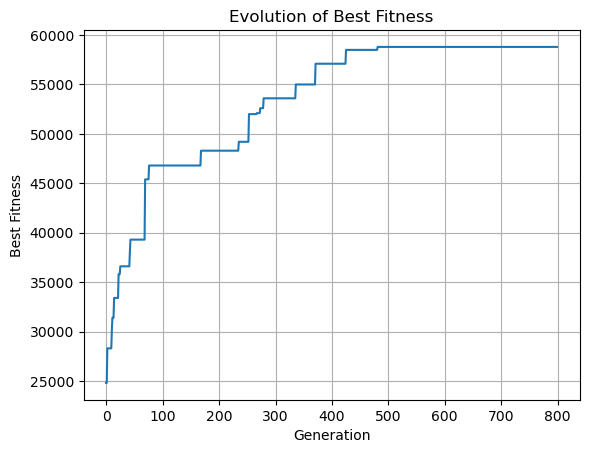


Best seating plan:
Table 1: [44, 31, 25, 56, 9, 32, 18, 57]
Table 2: [12, 14, 24, 23, 1, 38, 13, 0]
Table 3: [42, 39, 41, 45, 28, 40, 8, 49]
Table 4: [53, 2, 48, 7, 47, 46, 6, 3]
Table 5: [15, 20, 26, 16, 4, 21, 22, 17]
Table 6: [63, 34, 61, 35, 60, 59, 62, 19]
Table 7: [27, 51, 29, 50, 37, 52, 30, 43]
Table 8: [11, 55, 33, 58, 5, 10, 36, 54]
Best fitness across 10 runs: 61600


In [ ]:
ELITE_SIZE = int(0.02 * POP_SIZE) #2% of the population passes

for run in range(Iteration_Number):
    print(f"--- Run {run + 1} ---")
    
    best_solution, fitness_history = run_ga(
        relationship_matrix,
        mutation_fn=greedy_wrapper,
        crossover_fn=crossover_table_based,
        pop_size=POP_SIZE,
        guest_list=GUEST_LIST,
        num_generations=NUM_GENERATIONS,
        elite_size=ELITE_SIZE,
        mut_prob=MUT_PROB,
        selection_alg=roulette_selection
    )
    score = fitness(best_solution, relationship_matrix)
    if score > BEST_SCORE:
        BEST_SCORE = score
    #Save the best solution on pickle
    save_best_solution_if_improved(best_solution, relationship_matrix)

# Plot fitness over generations
plt.plot(fitness_history)
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.title("Evolution of Best Fitness")
plt.grid(True)
plt.show()

# Output best seating plan
print("\nBest seating plan:")
for i, table in enumerate(get_tables(best_solution)):
    print(f"Table {i+1}: {table}")

# Print the best fitness across all runs
print(f"Best fitness across {Iteration_Number} runs: {BEST_SCORE}")

### No Elitism with uniform crossover

--- Run 1 ---
Generation 0: Best fitness = 23100
Generation 10: Best fitness = 22800
Generation 20: Best fitness = 25900
Generation 30: Best fitness = 30300
Generation 40: Best fitness = 27100
Generation 50: Best fitness = 25700
Generation 60: Best fitness = 27600
Generation 70: Best fitness = 26100
Generation 80: Best fitness = 31800
Generation 90: Best fitness = 31200
Generation 100: Best fitness = 34100
Generation 110: Best fitness = 38900
Generation 120: Best fitness = 33300
Generation 130: Best fitness = 32700
Generation 140: Best fitness = 36100
Generation 150: Best fitness = 33400
Generation 160: Best fitness = 35600
Generation 170: Best fitness = 36800
Generation 180: Best fitness = 37000
Generation 190: Best fitness = 35100
Generation 200: Best fitness = 39500
Generation 210: Best fitness = 34600
Generation 220: Best fitness = 37300
Generation 230: Best fitness = 36200
Generation 240: Best fitness = 35900
Generation 250: Best fitness = 37900
Generation 260: Best fitness = 3380

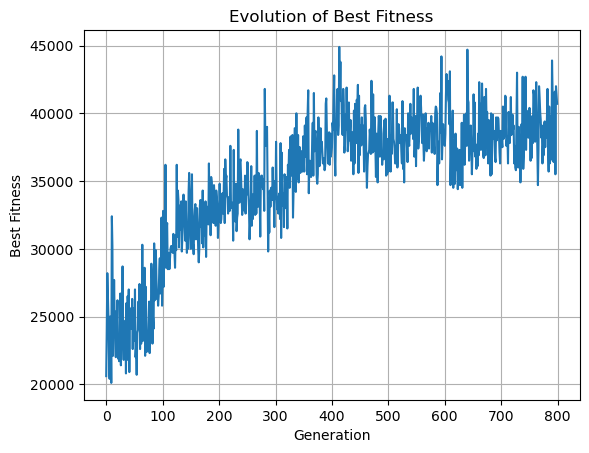


Best seating plan:
Table 1: [6, 3, 1, 7, 2, 0, 9, 8]
Table 2: [43, 37, 49, 55, 54, 22, 25, 32]
Table 3: [15, 60, 61, 39, 14, 40, 63, 48]
Table 4: [4, 16, 33, 51, 20, 53, 10, 47]
Table 5: [30, 45, 11, 50, 52, 41, 62, 31]
Table 6: [5, 59, 35, 36, 29, 26, 42, 27]
Table 7: [46, 28, 44, 24, 18, 23, 12, 13]
Table 8: [34, 19, 21, 17, 57, 38, 56, 58]
Best fitness across 10 runs: 61600


In [ ]:
ELITE_SIZE = 0

for run in range(Iteration_Number):
    print(f"--- Run {run + 1} ---")
    
    best_solution, fitness_history = run_ga(
        relationship_matrix,
        mutation_fn=greedy_wrapper,
        crossover_fn=uniform_guest_crossover,
        pop_size=POP_SIZE,
        guest_list=GUEST_LIST,
        num_generations=NUM_GENERATIONS,
        elite_size=ELITE_SIZE,
        mut_prob=MUT_PROB,
        selection_alg=roulette_selection
    )
    score = fitness(best_solution, relationship_matrix)
    if score > BEST_SCORE:
        BEST_SCORE = score
    #Save the best solution on pickle
    save_best_solution_if_improved(best_solution, relationship_matrix)

# Plot fitness over generations
plt.plot(fitness_history)
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.title("Evolution of Best Fitness")
plt.grid(True)
plt.show()

# Output best seating plan
print("\nBest seating plan:")
for i, table in enumerate(get_tables(best_solution)):
    print(f"Table {i+1}: {table}")

# Print the best fitness across all runs
print(f"Best fitness across {Iteration_Number} runs: {BEST_SCORE}")

### Elistim with uniform crossover

--- Run 1 ---
Generation 0: Best fitness = 21600
Generation 10: Best fitness = 30300
Generation 20: Best fitness = 30300
Generation 30: Best fitness = 30300
Generation 40: Best fitness = 30300
Generation 50: Best fitness = 30300
Generation 60: Best fitness = 35000
Generation 70: Best fitness = 35000
Generation 80: Best fitness = 35000
Generation 90: Best fitness = 35000
Generation 100: Best fitness = 35000
Generation 110: Best fitness = 35000
Generation 120: Best fitness = 35000
Generation 130: Best fitness = 35000
Generation 140: Best fitness = 35000
Generation 150: Best fitness = 35000
Generation 160: Best fitness = 35000
Generation 170: Best fitness = 35000
Generation 180: Best fitness = 35000
Generation 190: Best fitness = 35000
Generation 200: Best fitness = 35000
Generation 210: Best fitness = 37700
Generation 220: Best fitness = 37700
Generation 230: Best fitness = 37700
Generation 240: Best fitness = 37700
Generation 250: Best fitness = 37700
Generation 260: Best fitness = 3770

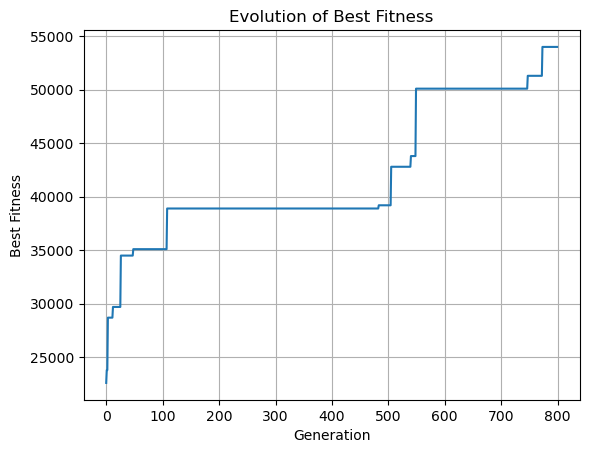


Best seating plan:
Table 1: [14, 13, 0, 2, 12, 1, 3, 10]
Table 2: [26, 25, 5, 27, 15, 17, 16, 19]
Table 3: [32, 36, 31, 37, 20, 34, 43, 53]
Table 4: [62, 8, 57, 47, 38, 33, 7, 56]
Table 5: [55, 54, 21, 6, 46, 59, 49, 61]
Table 6: [42, 45, 39, 30, 40, 28, 29, 60]
Table 7: [35, 23, 4, 24, 48, 9, 58, 63]
Table 8: [50, 11, 18, 22, 44, 52, 51, 41]
Best fitness across 10 runs: 61600


In [ ]:
ELITE_SIZE = int(0.02 * POP_SIZE) #2% of the population passes

for run in range(Iteration_Number):
    print(f"--- Run {run + 1} ---")
    
    best_solution, fitness_history = run_ga(
        relationship_matrix,
        mutation_fn=greedy_wrapper,
        crossover_fn=uniform_guest_crossover,
        pop_size=POP_SIZE,
        guest_list=GUEST_LIST,
        num_generations=NUM_GENERATIONS,
        elite_size=ELITE_SIZE,
        mut_prob=MUT_PROB,
        selection_alg=roulette_selection
    )
    score = fitness(best_solution, relationship_matrix)
    if score > BEST_SCORE:
        BEST_SCORE = score
    #Save the best solution on pickle
    save_best_solution_if_improved(best_solution, relationship_matrix)

# Plot fitness over generations
plt.plot(fitness_history)
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.title("Evolution of Best Fitness")
plt.grid(True)
plt.show()

# Output best seating plan
print("\nBest seating plan:")
for i, table in enumerate(get_tables(best_solution)):
    print(f"Table {i+1}: {table}")

# Print the best fitness across all runs
print(f"Best fitness across {Iteration_Number} runs: {BEST_SCORE}")